# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [8]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

### Exploratory Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

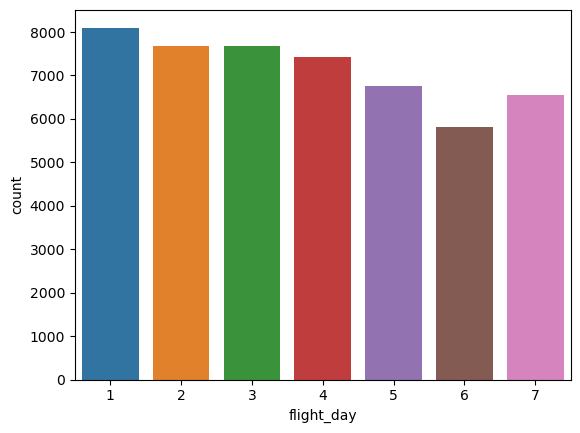

In [10]:
# What day are the most number of flights being booked?
sns.countplot(x=df['flight_day'])
plt.show()

From the visualization above, most number of flights were booked on Mondays and least on Saturdays. This could be because the prices of tickets are high during weekends, so customers prefer booking flights during weekdays when the price is low.

<AxesSubplot:xlabel='purchase_lead', ylabel='Count'>

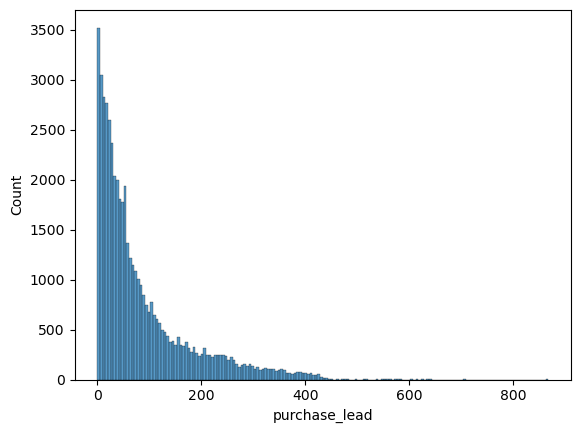

In [11]:
# Does advance booking have any affect on the booked number of passengers?
sns.histplot(df['purchase_lead'])

Most of the customers made bookings without on the day before, without any lead

In [12]:
df['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

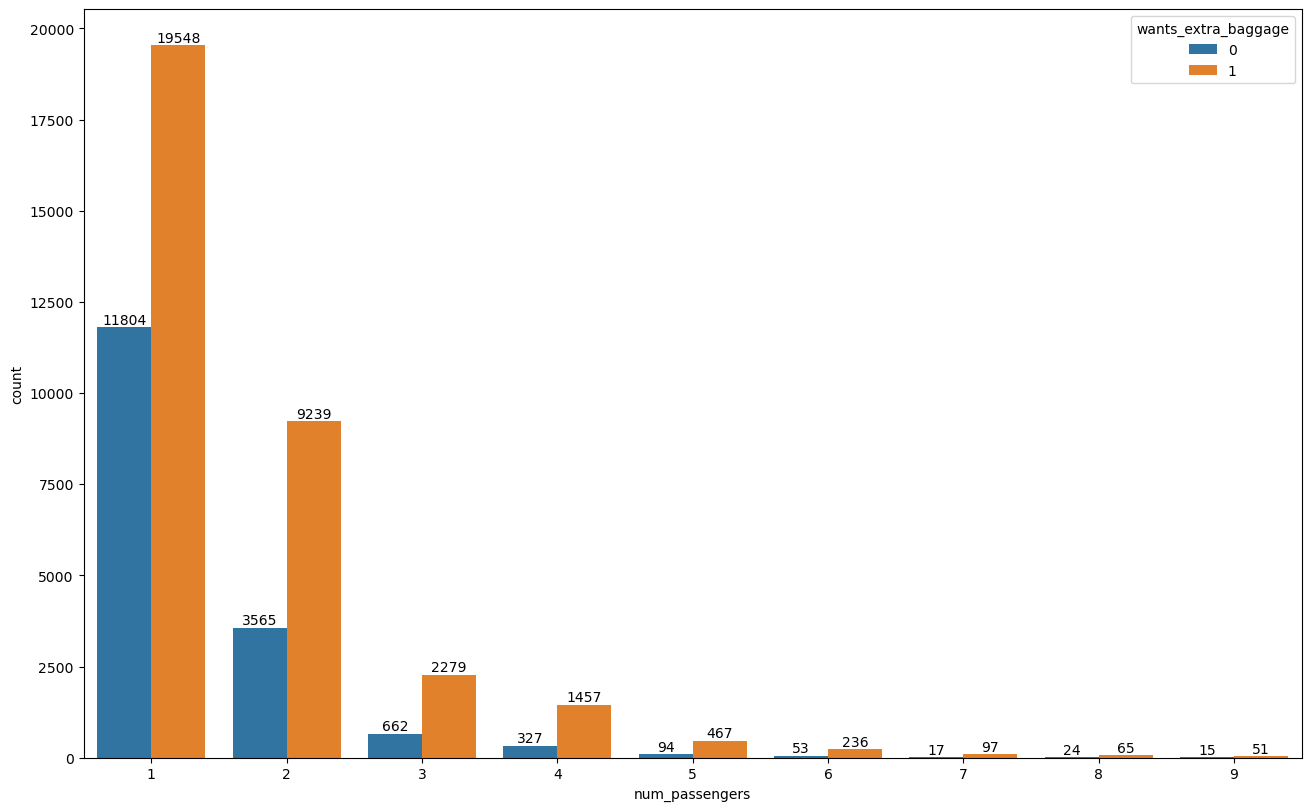

In [13]:
# Connection between num of passengers and extra baggage?
fig, ax = plt.subplots(figsize=(13, 8), layout='constrained')
ax = sns.countplot(x=df['num_passengers'],hue=df['wants_extra_baggage'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

In [14]:
df['Numer of days stay group'] = pd.cut(df.length_of_stay,bins=[0,20,40,60,80,100,200,300,400,500,600,700,800],labels=['<20','<40','<60','<80','<100','<200','<300','<400','<500','<600','<700','<800'])

In [15]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Numer of days stay group
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,<20
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,<20
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,<40
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,<40
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,<40


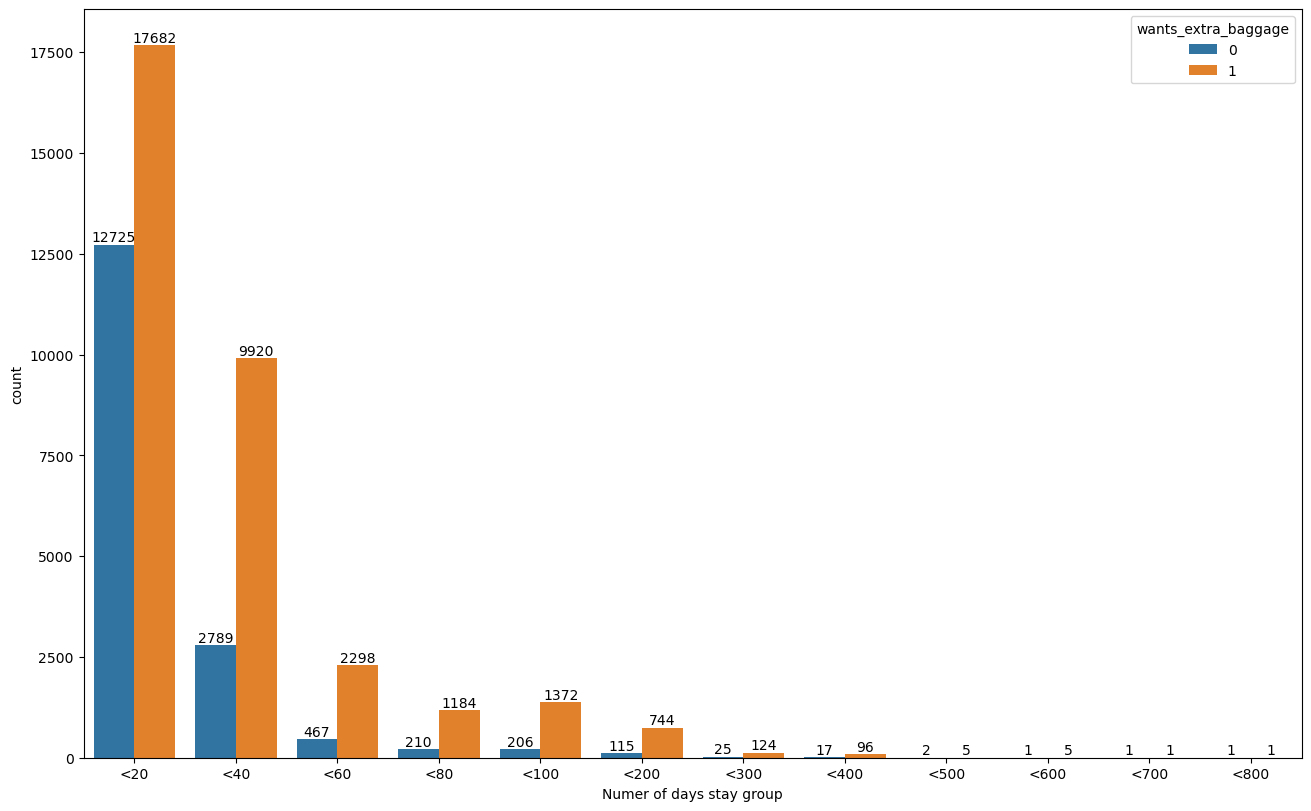

In [16]:
fig, ax = plt.subplots(figsize=(13, 8), layout='constrained')
sns.countplot(x=df['Numer of days stay group'],hue=df['wants_extra_baggage'])
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.show()

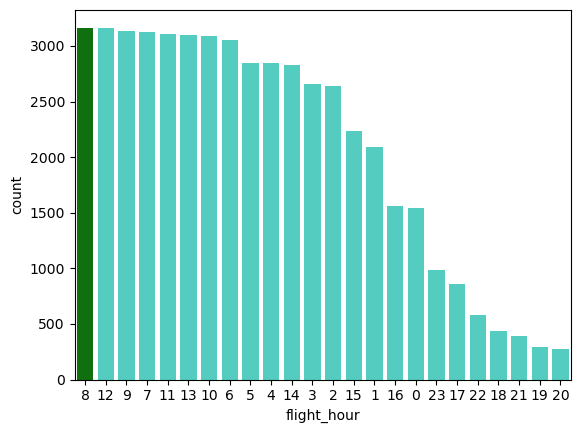

In [17]:
# Which hour are the most number of flights flying?
def set_custom_palette(series,max_color = 'green', other_color = 'turquoise'):
    max_val = series.max()
    pal = []
    
    for item in series:
        if item == max_val:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal

sns.countplot(x=df['flight_hour'],order=df['flight_hour'].value_counts().index,palette=set_custom_palette(df['flight_hour'].value_counts()))
plt.show()

In [18]:
df['sales_channel'].value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

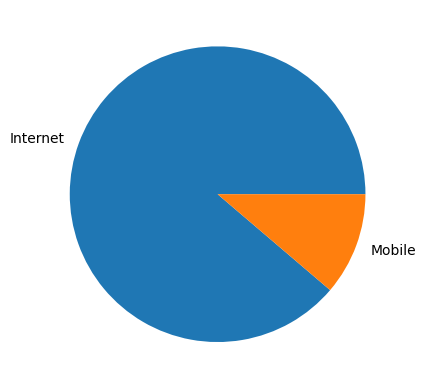

In [19]:
plt.pie(df['sales_channel'].value_counts(),labels=df['sales_channel'].value_counts().index)
plt.show()

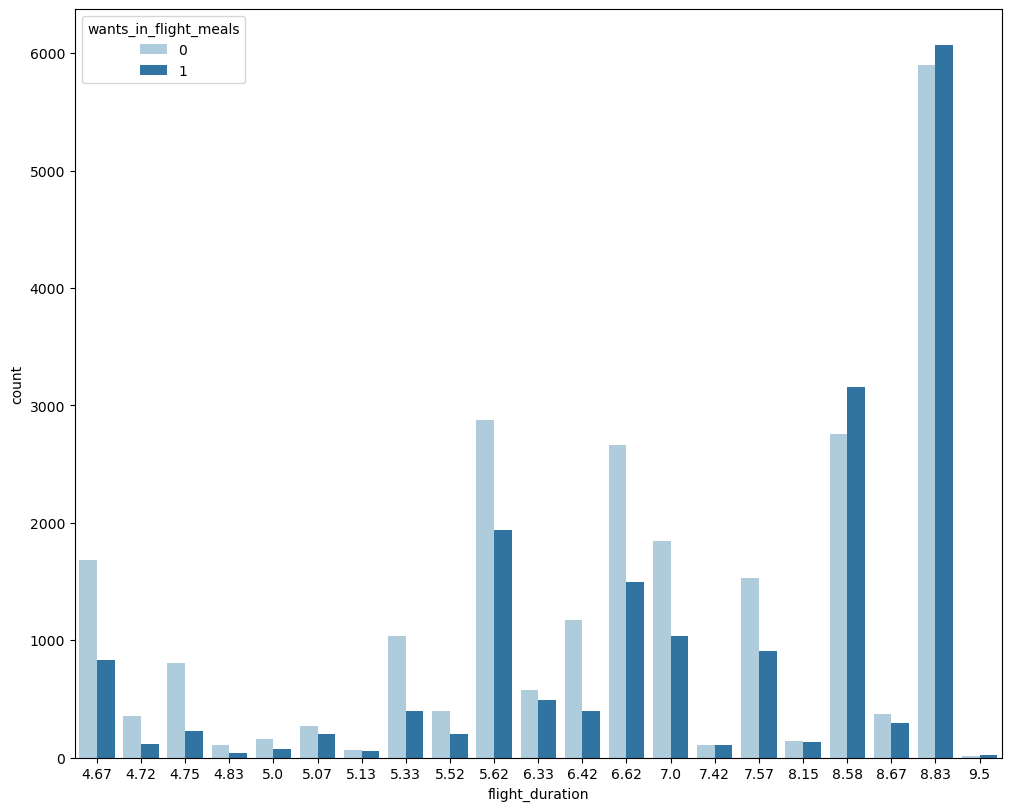

In [100]:
# Inflight meals = duration+country+route
fig, ax = plt.subplots(figsize=(10, 8), layout='constrained')
sns.countplot(x=df['flight_duration'],hue=df['wants_in_flight_meals'],palette=sns.color_palette('Paired'))
plt.show()

With the increase in flight duration, the number of people requesting for meals is increasing. Quality of food should therefore be maintained for longer flights.

### Data Pre processing

The flight route column does not add much information, therefore it can be removed

In [21]:
# removing flight route
df.drop(columns='route',inplace=True)

In [22]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Numer of days stay group
0,2,Internet,RoundTrip,262,19,7,6,New Zealand,1,0,0,5.52,0,<20
1,1,Internet,RoundTrip,112,20,3,6,New Zealand,0,0,0,5.52,0,<20
2,2,Internet,RoundTrip,243,22,17,3,India,1,1,0,5.52,0,<40
3,1,Internet,RoundTrip,96,31,4,6,New Zealand,0,0,1,5.52,0,<40
4,2,Internet,RoundTrip,68,22,15,3,India,1,0,1,5.52,0,<40


#### Outliers detection

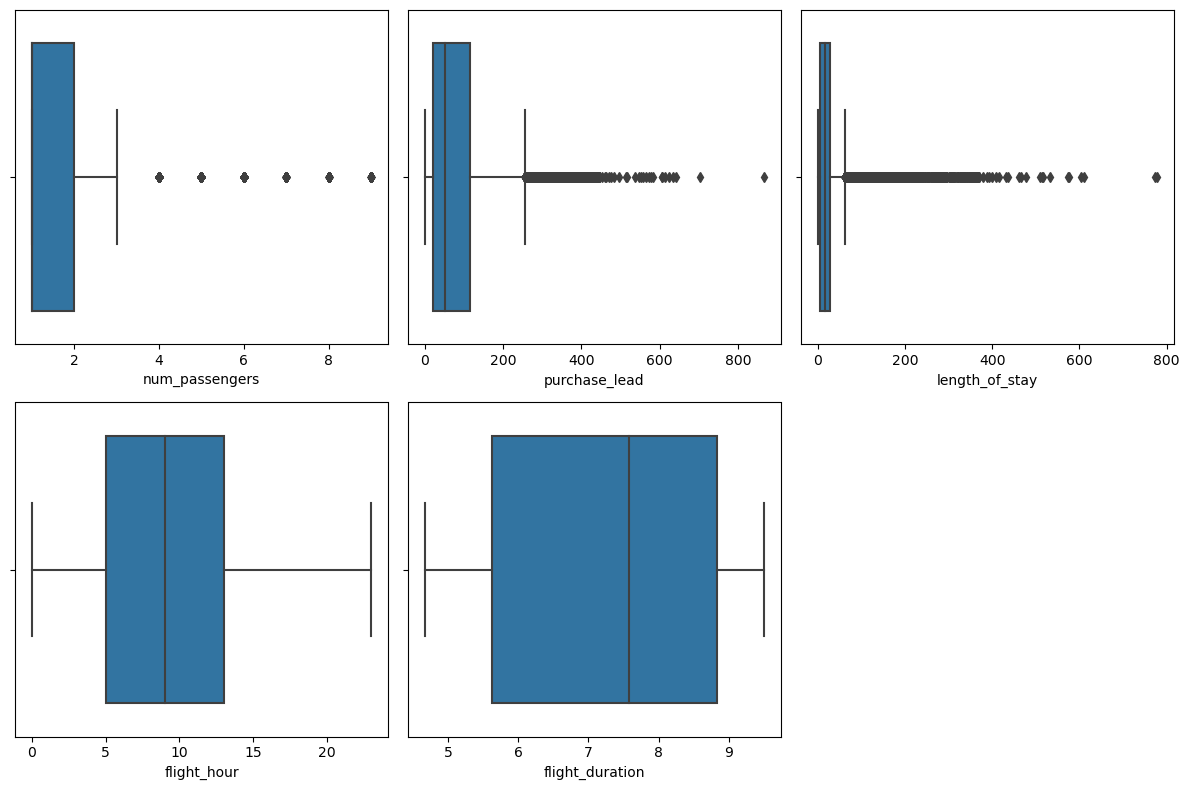

In [23]:
num = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
plt.figure(figsize=(12,8))

for i, column in enumerate (df[num].columns, 1):
    plt.subplot(2,3,i)
    sns.boxplot(data=df[num], x=df[column])
    plt.tight_layout()

In [24]:
import numpy as np

In [25]:
def calculate_upper_lower_limit(feature):
    percentile25 = feature.quantile(0.25)
    percentile75 = feature.quantile(0.75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75+1.5 *iqr
    lower_limit = percentile25-1.5*iqr
    return upper_limit,lower_limit

In [26]:
# Removing outliers in purchase_lead
upper_limit_pl,lower_limit_pl = calculate_upper_lower_limit(df['purchase_lead'])
df[df['purchase_lead'] > upper_limit_pl].count()

num_passengers              3456
sales_channel               3456
trip_type                   3456
purchase_lead               3456
length_of_stay              3456
flight_hour                 3456
flight_day                  3456
booking_origin              3456
wants_extra_baggage         3456
wants_preferred_seat        3456
wants_in_flight_meals       3456
flight_duration             3456
booking_complete            3456
Numer of days stay group    3456
dtype: int64

In [27]:
# trimming
df = df[df['purchase_lead'] < upper_limit_pl]

In [28]:
# Upper limit and lower limit in length of stay feature
upper_limit_st,lower_limit_st = calculate_upper_lower_limit(df['length_of_stay'])
df[df['length_of_stay'] > upper_limit_st].count()

num_passengers              3441
sales_channel               3441
trip_type                   3441
purchase_lead               3441
length_of_stay              3441
flight_hour                 3441
flight_day                  3441
booking_origin              3441
wants_extra_baggage         3441
wants_preferred_seat        3441
wants_in_flight_meals       3441
flight_duration             3441
booking_complete            3441
Numer of days stay group    3441
dtype: int64

In [29]:
# trimming
df = df[df['length_of_stay'] < upper_limit_st]

In [30]:
# drop number of days stay group
df.drop(columns='Numer of days stay group',inplace=True)

### Split Data

In [37]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='booking_complete',axis = 1)
y = df['booking_complete']
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

### One hot encoding of categorical variables

In [38]:
# define all categorical variables
categorical_features = ['sales_channel','trip_type','booking_origin']
X = pd.get_dummies(X,columns=categorical_features)

### Split Data

In [39]:
X_train,X_test,y_train,y_val =  train_test_split(X,y,test_size = 0.2,random_state = 0)

### Random Forest classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 15, n_estimators = 150)

In [43]:
rf_classifier = rf.fit(X_train,y_train)

In [44]:
rf_classifier.score(X_train,y_train)

0.8616761594792515

### Evaluate

In [45]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

# This function calculates the performance of the model using evaluation metrics and returns the scores
def evaluate(y_true, y_pred, y_pred_prob):
    ''' This function takes true labels of the train dataset, predicted labels of the trained dataset by the model 
    and predicted probability of the model as inputs and evaluates the model using evaluation metrics'''
    print(f"\nBalanced accuracy score : {np.round(balanced_accuracy_score(y_true, y_pred),2)}")
    print(f"Precision score : {np.round(precision_score(y_true, y_pred, average='micro'),2)}")
    print(f"Recall score : {np.round(recall_score(y_true, y_pred, average='micro'),2)}")
    print(f"F1 score : {np.round(f1_score(y_true, y_pred, average='micro'),2)}")
    print(f"ROC AUC score : {np.round(roc_auc_score(y_true, y_pred_prob),2)}")
    print("\n")

# This function plots the confusion matrix based on the classifier passed as an argument
class_names = np.array([0,1])
def confusion_matrix(clf, X_test, y_test, class_names):
    ''' This function takes the classifier, test dataset along with its labels 
    and class names as inputs and displays confusion matrix of the classifier'''
    disp = ConfusionMatrixDisplay.from_estimator(clf,
                                                 X_test,
                                                 y_test,
                                                 display_labels=class_names,
                                                 cmap=plt.cm.Blues,
                                                 normalize=None)
    plt.grid(False)
    plt.show()

In [46]:
evaluate(y_test,rf.predict(X_test),rf.predict_proba(X_test)[:,1])


Balanced accuracy score : 0.51
Precision score : 0.85
Recall score : 0.85
F1 score : 0.85
ROC AUC score : 0.77




In [47]:
class_names = np.array([0,1])

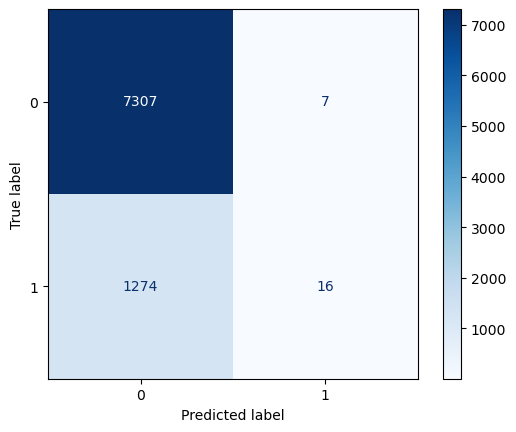

In [48]:
confusion_matrix(rf,X_test,y_test,class_names)

The model gave good accuracy results, but it didnt do a great job, in identifying class 1. This could be due to less number of class 1 samples in the dataset. This can be corrected by oversampling

### Oversampling

In [50]:
pip install imblearn

In [53]:
from imblearn.over_sampling import SMOTENC

In [54]:
smote = SMOTENC(random_state=0,categorical_features = [1,2,7,8])

In [55]:
X,y = smote.fit_resample(X,y)

In [59]:
#split data
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size = 0.2,random_state = 0)

### Re apply the algorithm

In [57]:
rf_classifier_smote = rf.fit(X_train,y_train)

In [60]:
evaluate(y_test,rf.predict(X_test),rf.predict_proba(X_test)[:,1])


Balanced accuracy score : 0.77
Precision score : 0.77
Recall score : 0.77
F1 score : 0.77
ROC AUC score : 0.85




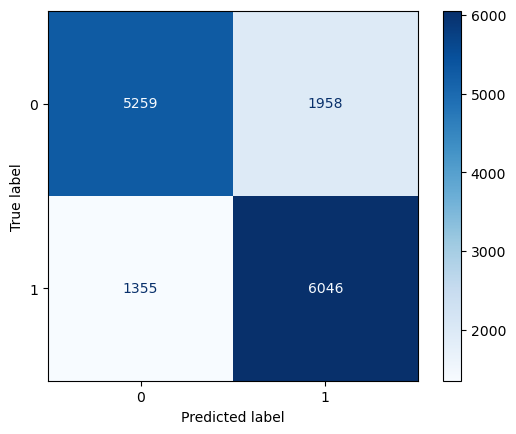

In [61]:
confusion_matrix(rf,X_test,y_test,class_names)

After oversampling, the results are better. The algorithm is now able to efficiently classify between the classes.

### Feature Importance 

In [88]:
feature_scores = np.sort(rf.feature_importances_)

In [93]:
feature_scores = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

In [96]:
feature_scores[:10].index

Index(['length_of_stay', 'booking_origin_Australia', 'booking_origin_Malaysia',
       'flight_duration', 'purchase_lead', 'flight_hour', 'flight_day',
       'num_passengers', 'sales_channel_Mobile', 'booking_origin_South Korea'],
      dtype='object')

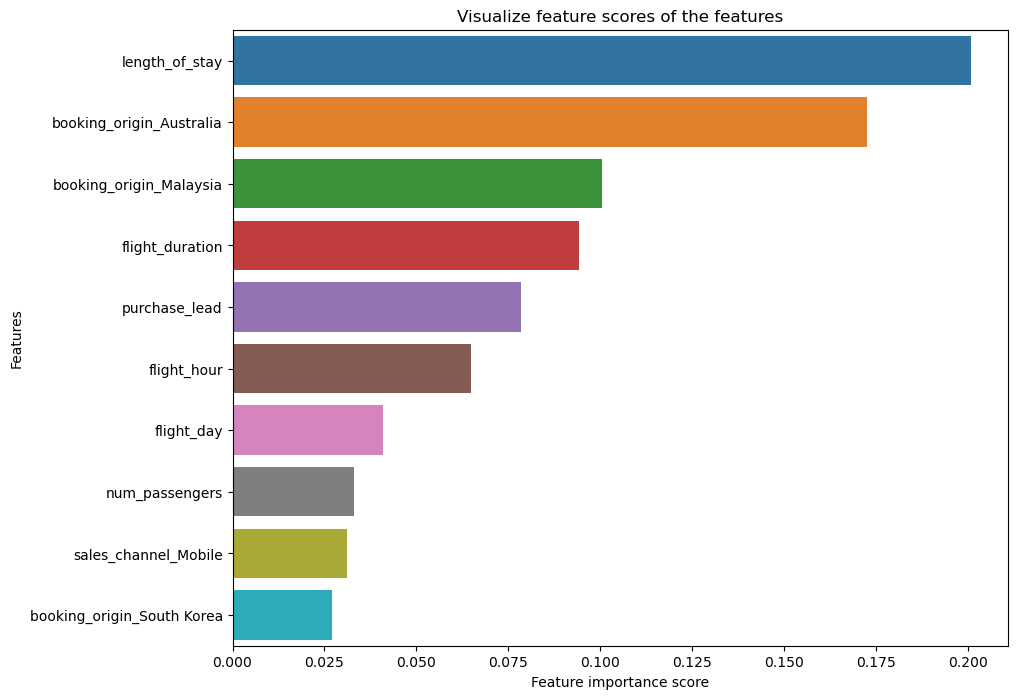

In [99]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(x=feature_scores[:10], y=feature_scores[:10].index, data=df)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores[:10].index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

These are the main features influencing the customer behaviour in making a booking.